In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

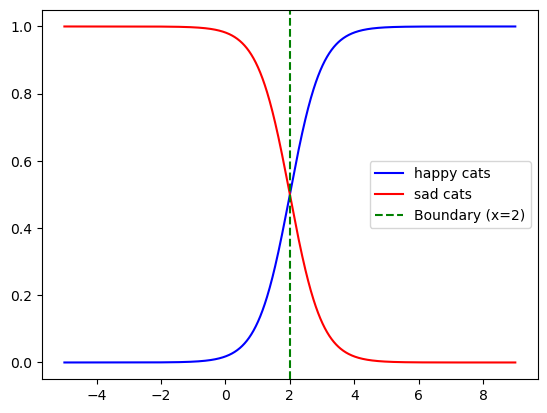

In [2]:
#T2
'''
From the question, we assume equal prior probabilities. Then we can manually calculate
the decision boundary from the mean value of 2 dist which is x = 2.
'''
def norm_dis(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

mu1 = 4
mu2 = 0
sigma = np.sqrt(2)

x = np.linspace(-5, 9, 1000)

lh1 = norm_dis(x, mu1, sigma)
lh2 = norm_dis(x, mu2, sigma)

post1 = lh1 / (lh1 + lh2)
post2 = lh2 / (lh1 + lh2)

plt.plot(x, post1, label="happy cats", color='blue')
plt.plot(x, post2, label="sad cats", color='red')
plt.axvline(x = 2, color='green',linestyle='--', label='Boundary (x=2)')
plt.legend()
plt.show()


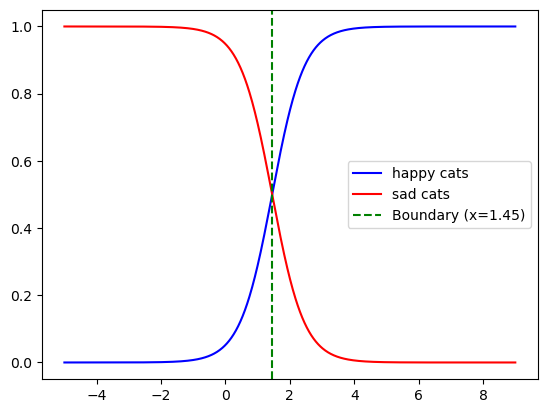

In [3]:
#T3
'''
From the question, we assume cat with the happy has a prior of 0.75 then
cat with the sad has a prior of 0.25.
After manually calculating the decision boundary, x is estimated to 1.45
'''
p1 = 0.75
p2 = 0.25
num1 = lh1*p1
num2 = lh2*p2

evidence = num1 + num2
post1 = num1 / evidence
post2 = num2 / evidence

plt.plot(x, post1, label="happy cats", color='blue')
plt.plot(x, post2, label="sad cats", color='red')
plt.axvline(x = 1.45, color='green',linestyle='--', label='Boundary (x=1.45)')
plt.legend()
plt.show()


In [ ]:
#OT2

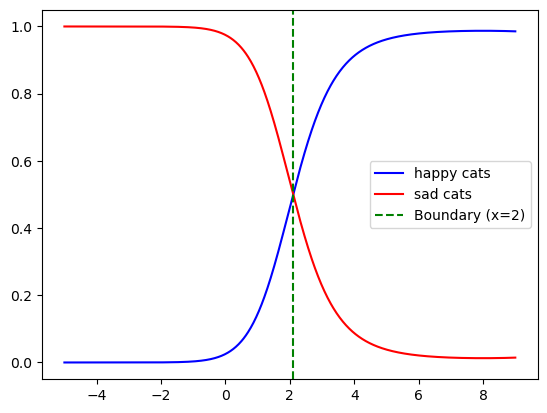

In [107]:
#OT3
'''
The decision boundary is around 2.105 found from the intersection.
'''
mu1 = 4
mu2 = 0
sigma1 = np.sqrt(2)
sigma2 = 2

x = np.linspace(-5, 9, 1000)

lh1 = norm_dis(x, mu1, sigma1)
lh2 = norm_dis(x, mu2, sigma2)

post1 = lh1 / (lh1 + lh2)
post2 = lh2 / (lh1 + lh2)

plt.plot(x, post1, label="happy cats", color='blue')
plt.plot(x, post2, label="sad cats", color='red')
plt.axvline(x = 2.105, color='green',linestyle='--', label='Boundary (x=2)')
plt.legend()
plt.show()

# Employee Attrition Prediction



### read CSV

In [4]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [5]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [6]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [7]:
# print(df.info())
# print(df["Attrition"].mode())

### Feature transformation

In [8]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes
# HANDLE NULL NUMBERS
# INSERT CODE HERE
for col in df.columns:
    if df[col].dtype == np.float64:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
    
df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 42, stratify = df["Attrition"])

### Display histogram of each feature

In [11]:
def display_histogram(df, col_name, cls, n_bin = 40):
    # INSERT CODE HERE
    classes = df[cls].unique()
    colors = ['steelblue', 'orange']

    for i, class_val in enumerate(classes):
        data_filtered = df[(df[cls] == class_val) & (df[col_name].notna())][col_name]
        hist, bin_edge = np.histogram(data_filtered, bins=n_bin)
        plt.fill_between(bin_edge.repeat(2)[1:-1], 
                         hist.repeat(2), 
                         facecolor=colors[i%len(colors)],
                         alpha=0.5,
                         label=f'{cls}: {class_val}')
        free_bin_indices = np.where(hist == 0)[0]
        print(f"Number of free bins: {len(free_bin_indices)}")
    plt.title(f'Histogram of {col_name} grouped by {cls} with bins {n_bin}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

From the Age, There are no free bins. \
From the MonthlyIncome, there are no free bins. \
From the DistanceFromHome, there are 11 free bins. \
Age and MonthlyIncome are good discretization but DistanceFromHome is not. So to solve this we must decrease bins size for DistanceFromHome.

Number of free bins: 1
Number of free bins: 0


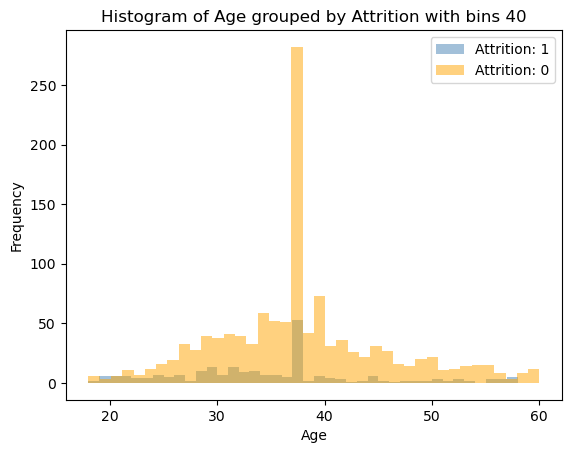

Number of free bins: 12
Number of free bins: 0


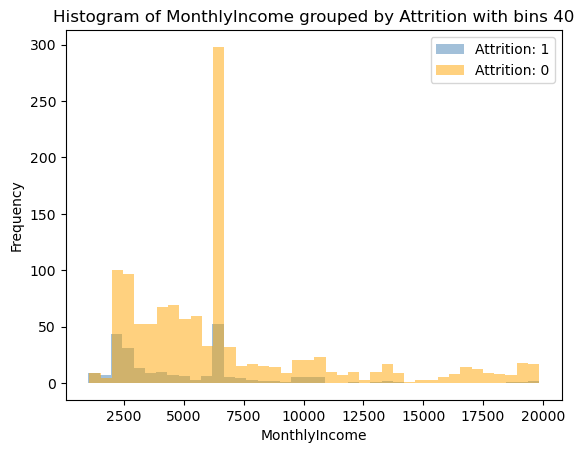

Number of free bins: 11
Number of free bins: 11


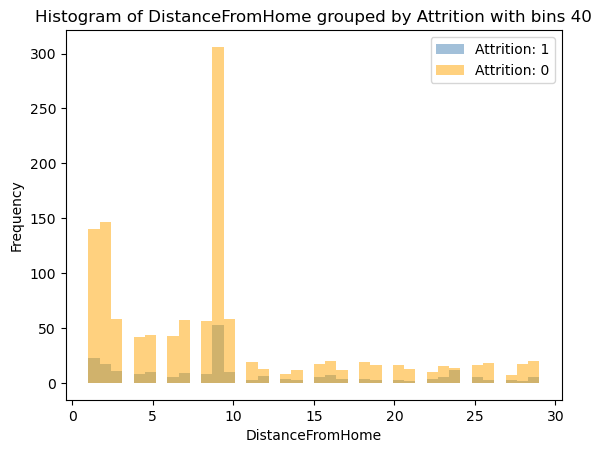

In [12]:
display_histogram(df, 'Age', 'Attrition')
display_histogram(df, 'MonthlyIncome', 'Attrition')
display_histogram(df, 'DistanceFromHome', 'Attrition')

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

From the histogram from T4. \
There are only Age that look like the normal distribution, and the rest is not.\
So I think Age can use the gaussian to estimate while others use the GMM.

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

Age: Can use either 10 or 40, but I think 40 would be a better choices because 40 bins are detailed and the distribution is look like gaussian. \
MonthlyIncome: I think 40 is the best because the data is not normal distribution and the 100 has a free bins which is bad discretization. \
DistanceFromHome: The best is obivious 10 because all bins have data inside.

Number of free bins: 0
Number of free bins: 0


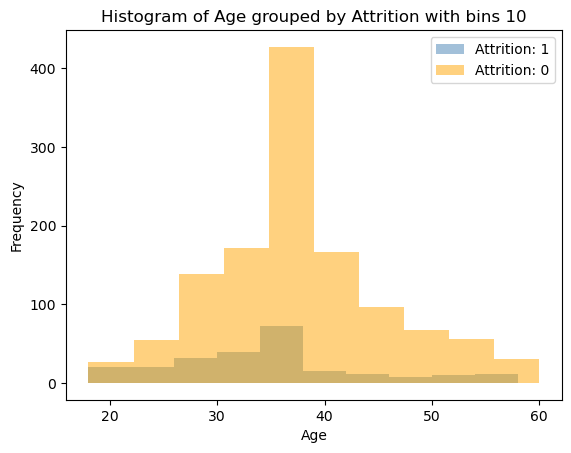

Number of free bins: 1
Number of free bins: 0


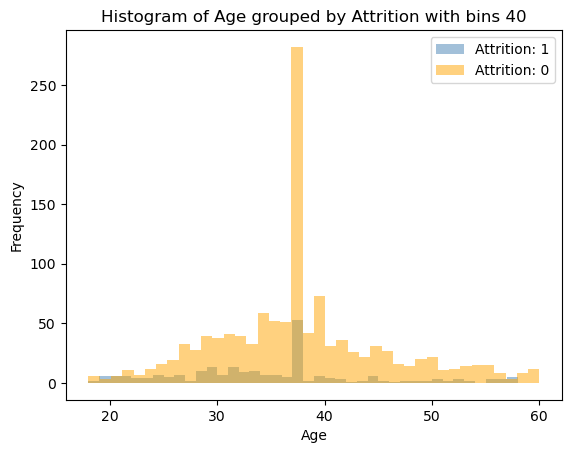

Number of free bins: 61
Number of free bins: 57


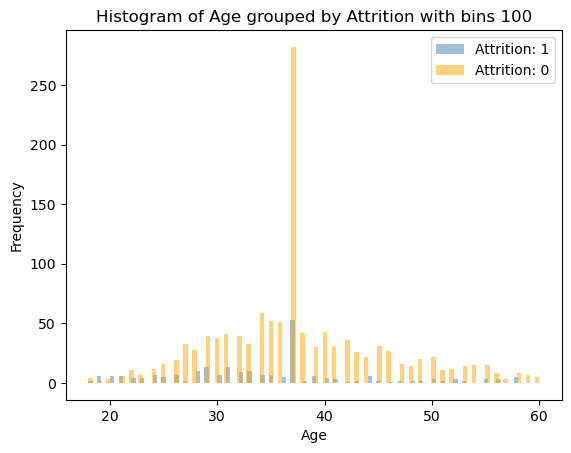

Number of free bins: 2
Number of free bins: 0


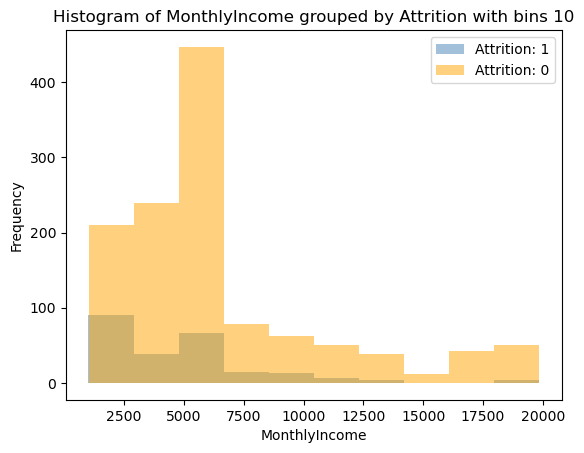

Number of free bins: 12
Number of free bins: 0


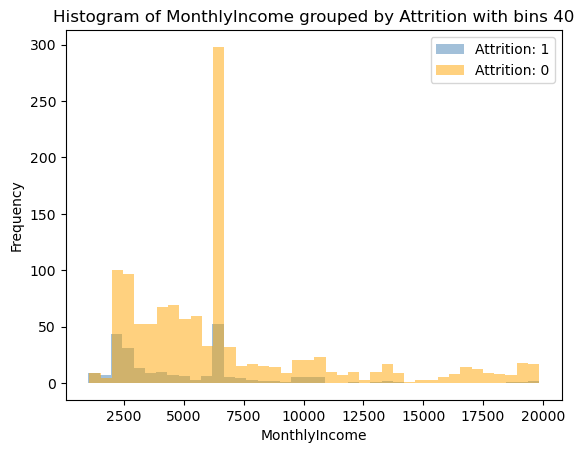

Number of free bins: 45
Number of free bins: 5


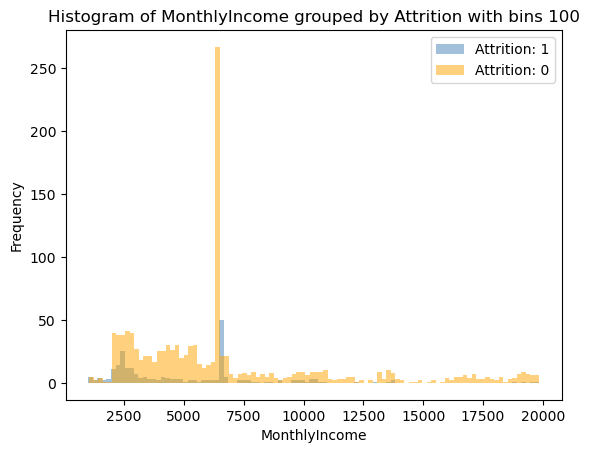

Number of free bins: 0
Number of free bins: 0


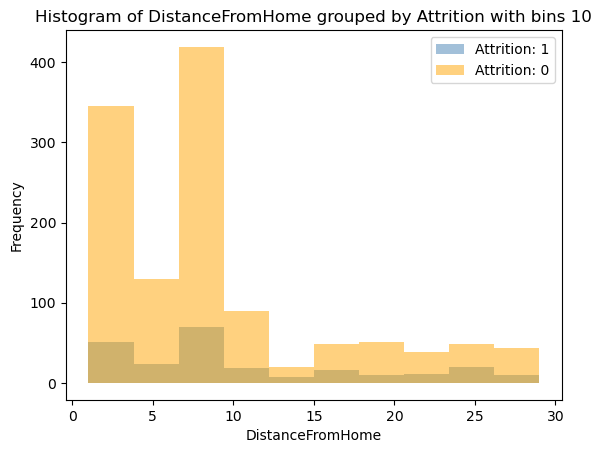

Number of free bins: 11
Number of free bins: 11


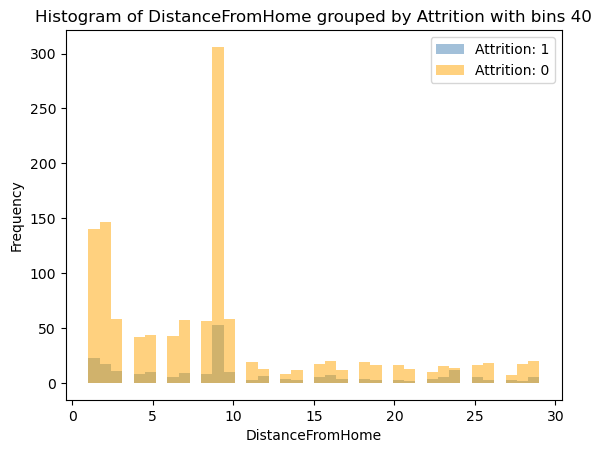

Number of free bins: 70
Number of free bins: 70


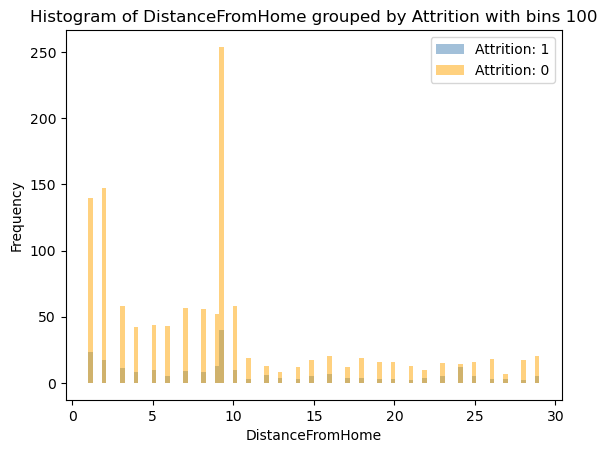

In [13]:
#bins = 10
for col in ['Age', 'MonthlyIncome', 'DistanceFromHome']:
    for bin in [10, 40, 100]:
        display_histogram(df, col, 'Attrition', bin)

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

Features with less than 10 unique value should not discretized.
but others should.

Age is discretized.
Number of free bins: 0
Number of free bins: 0


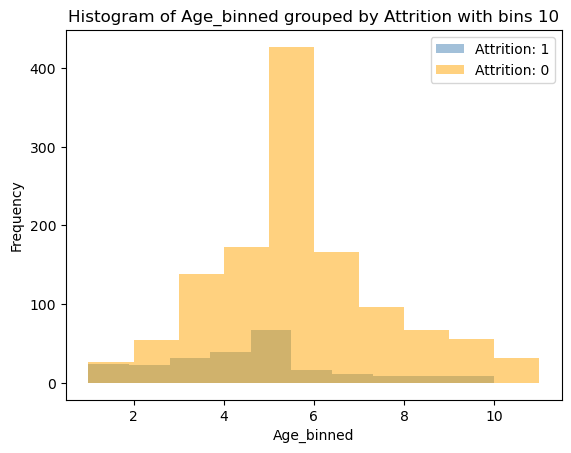

BusinessTravel is not discretize
DailyRate is discretized.
Number of free bins: 0
Number of free bins: 0


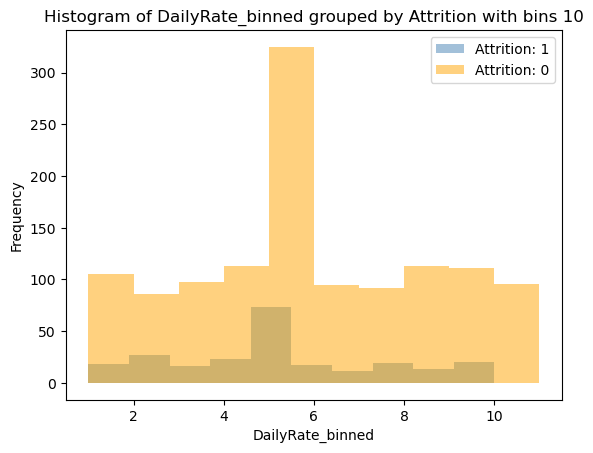

Department is not discretize
DistanceFromHome is discretized.
Number of free bins: 0
Number of free bins: 0


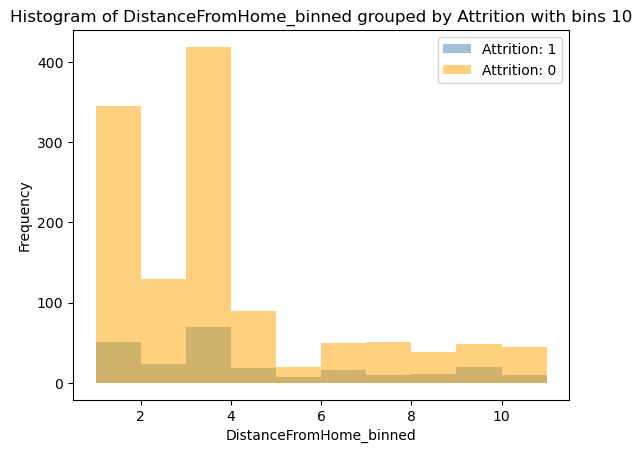

Education is not discretize
EducationField is not discretize
EnvironmentSatisfaction is not discretize
Gender is not discretize
HourlyRate is discretized.
Number of free bins: 0
Number of free bins: 0


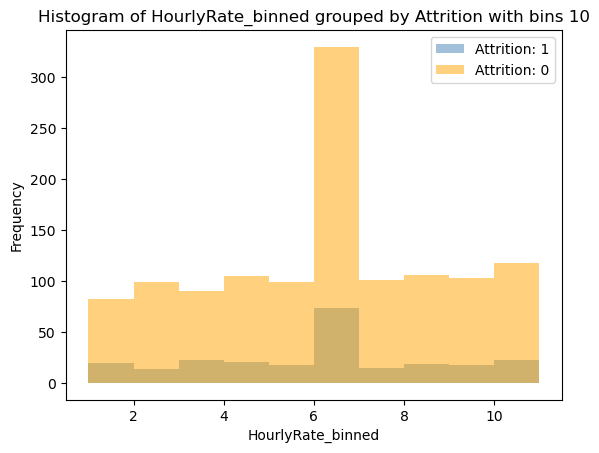

JobInvolvement is not discretize
JobLevel is not discretize
JobRole is discretized.
Number of free bins: 0
Number of free bins: 0


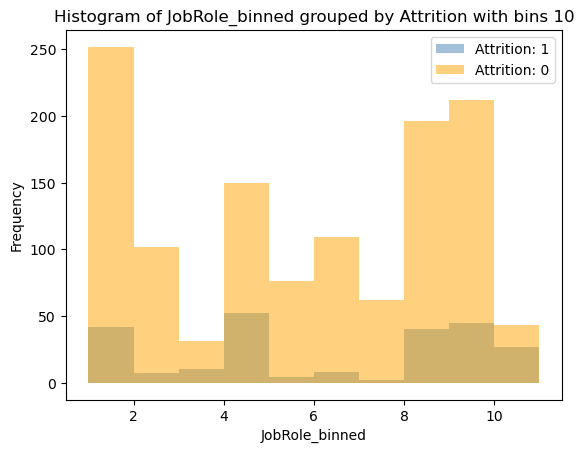

JobSatisfaction is not discretize
MaritalStatus is not discretize
MonthlyIncome is discretized.
Number of free bins: 2
Number of free bins: 0


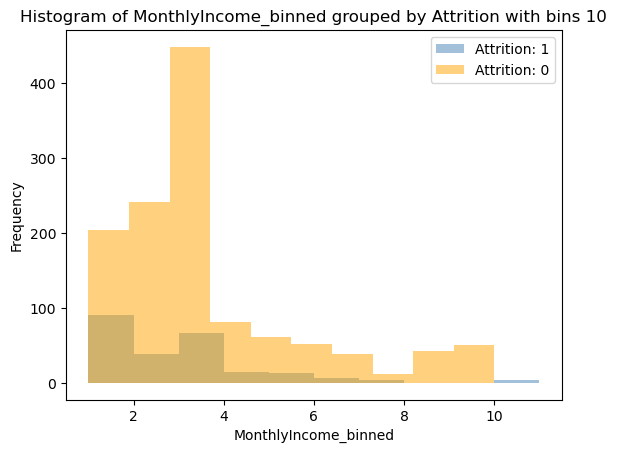

MonthlyRate is discretized.
Number of free bins: 0
Number of free bins: 0


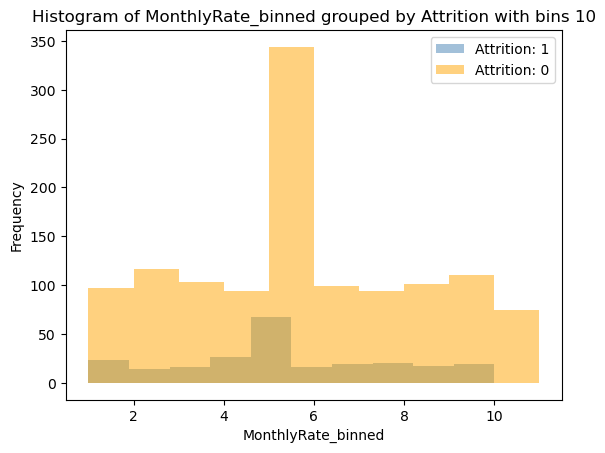

NumCompaniesWorked is discretized.
Number of free bins: 0
Number of free bins: 0


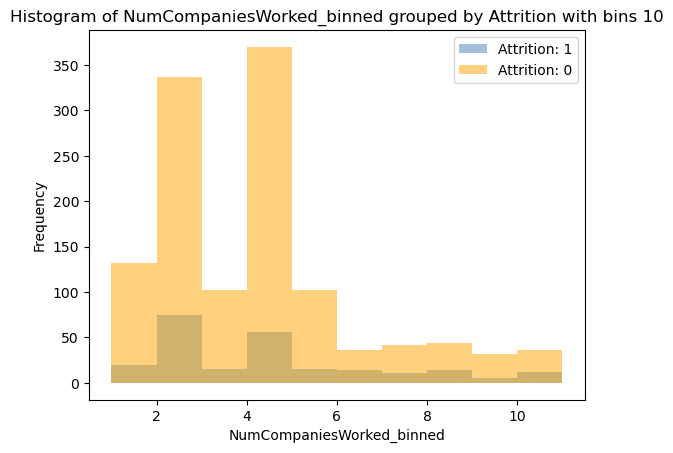

OverTime is not discretize
PercentSalaryHike is discretized.
Number of free bins: 0
Number of free bins: 0


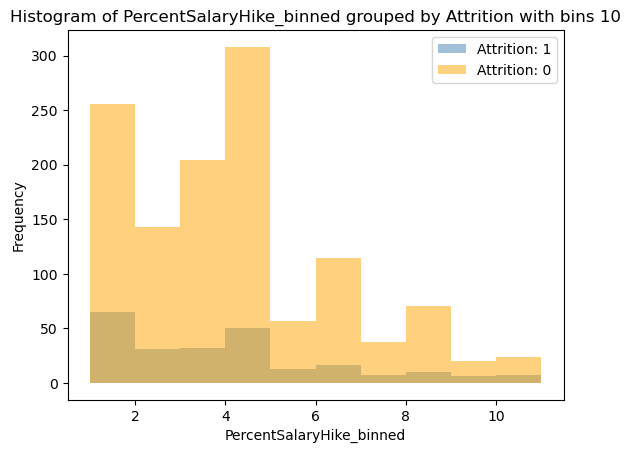

PerformanceRating is not discretize
RelationshipSatisfaction is not discretize
StockOptionLevel is not discretize
TotalWorkingYears is discretized.
Number of free bins: 0
Number of free bins: 0


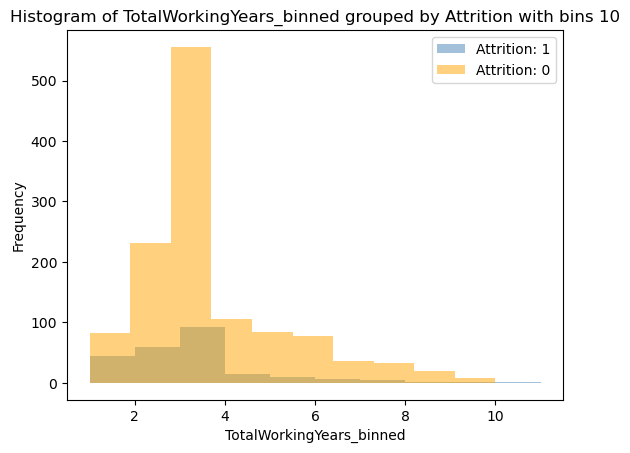

TrainingTimesLastYear is not discretize
WorkLifeBalance is not discretize
YearsAtCompany is discretized.
Number of free bins: 2
Number of free bins: 0


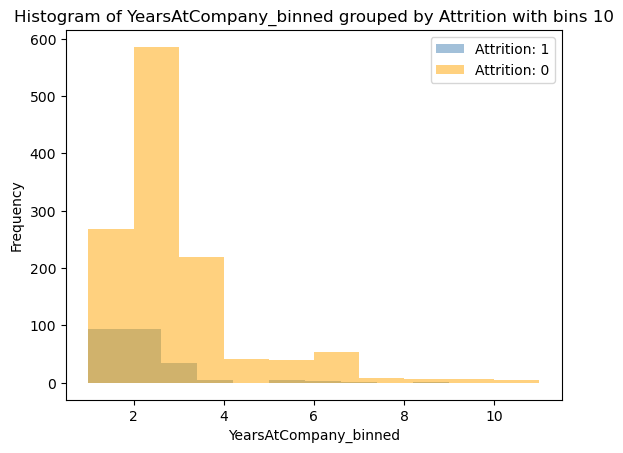

YearsInCurrentRole is discretized.
Number of free bins: 1
Number of free bins: 0


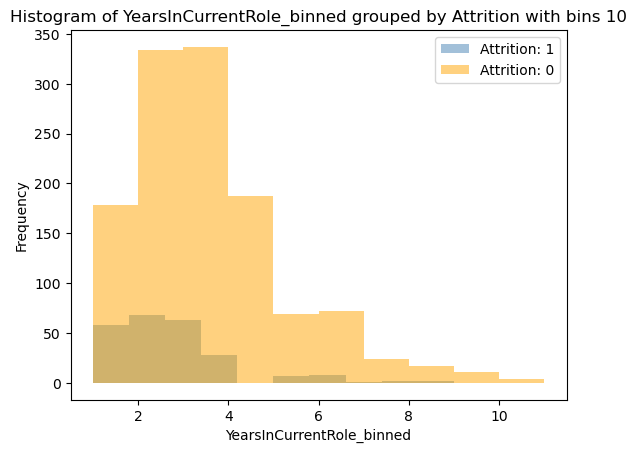

YearsSinceLastPromotion is discretized.
Number of free bins: 1
Number of free bins: 0


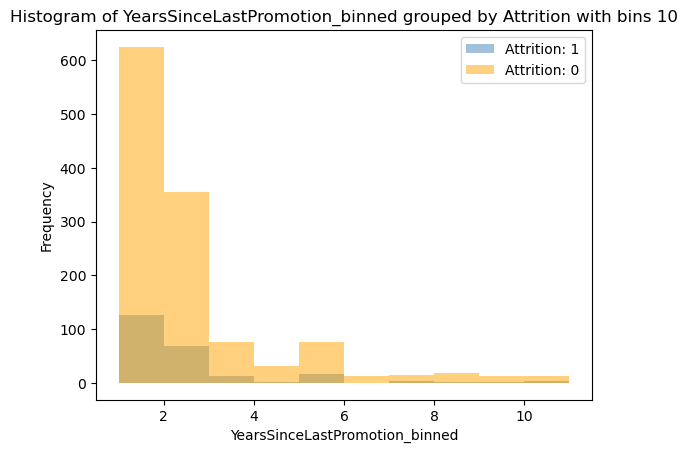

YearsWithCurrManager is discretized.
Number of free bins: 2
Number of free bins: 0


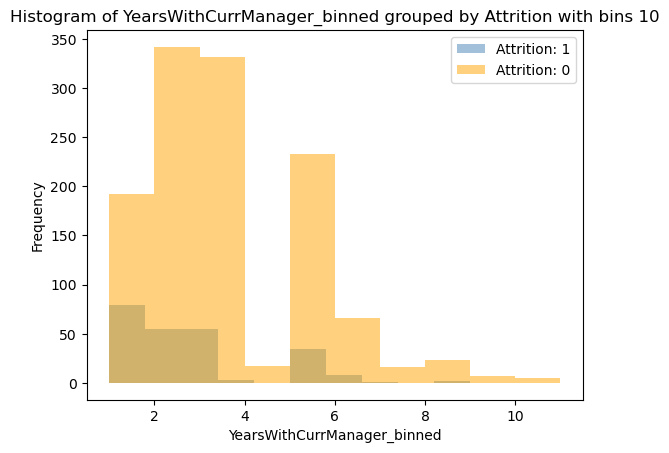

In [14]:
for col in df.columns:
    if col != 'Attrition':
        if df[col].nunique() < 10:
            print(f'{col} is not discretize')
        else:
            print(f'{col} is discretized.')
            new_fea = f'{col}_binned'
            bin_edges = np.linspace(df[col].min(), df[col].max(), 11)
            df[new_fea] = np.digitize(df[col], bin_edges)
            df[new_fea] = np.digitize(df[col], bin_edges)
            display_histogram(df, new_fea, 'Attrition', 10)

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

1. We should use Categorical Distribution because we digitize data to the discrete bins.
2. MLE for the likelihood distribution. \
Finding probability for each bins by
    1. Count data points in each bins.
    2. Divided by total data points
    3. P(bin) = count(bin)/total_count

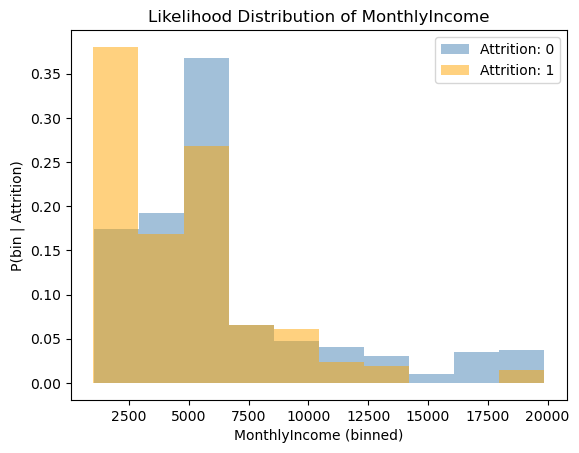

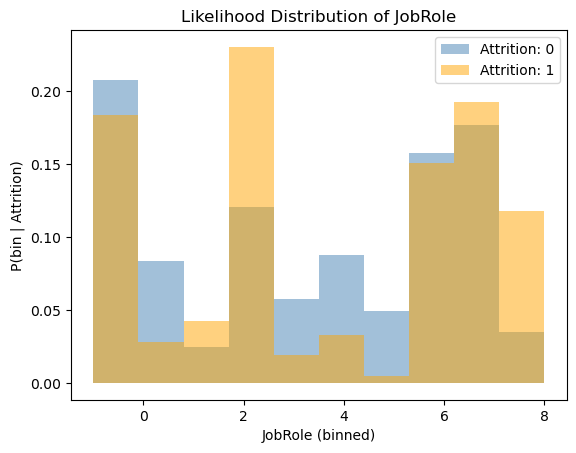

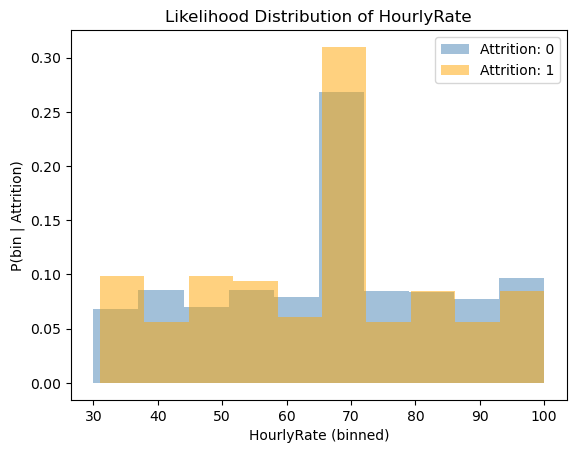

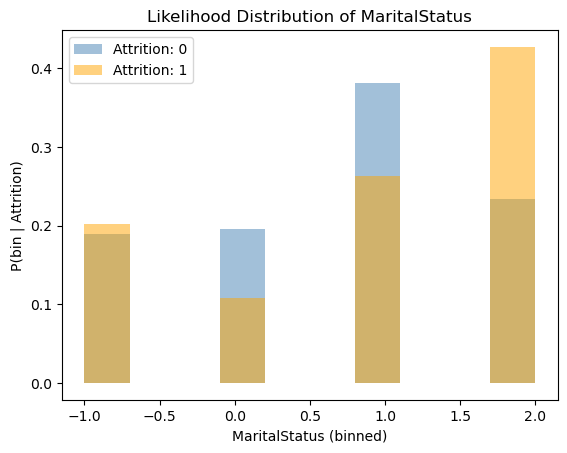

In [15]:
for col in ['MonthlyIncome','JobRole','HourlyRate','MaritalStatus']:
    classes = df_train['Attrition'].unique()
    colors = ['steelblue', 'orange']

    for i, class_val in enumerate(classes):
        data_class = df_train[df_train['Attrition'] == class_val][col]
        data_class = data_class[~np.isnan(data_class)]
        hist, bin_edge = np.histogram(data_class, bins=10)

        total = hist.sum()
        lh = hist/total
        plt.fill_between(bin_edge.repeat(2)[1:-1], 
                         lh.repeat(2), 
                         facecolor=colors[i],
                         alpha=0.5,
                         label=f'Attrition: {class_val}')

    plt.title(f'Likelihood Distribution of {col}')
    plt.xlabel(f'{col} (binned)')
    plt.ylabel('P(bin | Attrition)')
    plt.legend()
    plt.show()
    

### T9. What is the prior distribution of the two classes?

In [16]:
A0 = df.loc[df['Attrition'] == 0, 'Attrition'].count()
A1 = df.loc[df['Attrition'] == 1, 'Attrition'].count()

p0 = A0/(A0 + A1)
p1 = A1/(A0 + A1)

print(f'Attrition 0 : {p0}')
print(f'Attrition 1 : {p1}')

Attrition 0 : 0.8387755102040816
Attrition 1 : 0.16122448979591836


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

add some small value (like 1e-10) to make non zero. Laplace smoothing\
Instead of P = count_bin/total\
add "a" which is a small value and use P = (count_bin + a)/(total_count + a*bins)

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [17]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [18]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [19]:
x_train = df_train.drop(columns=['Attrition']).to_numpy()
y_train = df_train['Attrition'].to_numpy()

x_test = df_test.drop(columns=['Attrition']).to_numpy()
y_test = df_test['Attrition'].to_numpy()

In [20]:
model = SimpleBayesClassifier(n_pos = (y_train==1).sum(), n_neg = (y_train==0).sum())
print((y_train==1).sum())
print((y_train==0).sum())

213
1110


In [21]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8, 5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1,0)
    
check_prior()

In [22]:
model.fit_params(x_train, y_train)

([(array([0.01875   , 0.04196429, 0.11428571, 0.14375   , 0.34285714,
          0.13214286, 0.07589286, 0.05625   , 0.04910714, 0.025     ]),
   array([-inf, 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8,  inf])),
  (array([0.20714286, 0.00089286, 0.00089286, 0.08928571, 0.00089286,
          0.00089286, 0.1375    , 0.00089286, 0.00089286, 0.56071429]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.08035714, 0.06607143, 0.08214286, 0.09196429, 0.26517857,
          0.07767857, 0.07589286, 0.09285714, 0.09196429, 0.07589286]),
   array([  -inf,  241.7,  381.4,  521.1,  660.8,  800.5,  940.2, 1079.9,
          1219.6, 1359.3,    inf])),
  (array([0.19285714, 0.00089286, 0.00089286, 0.03571429, 0.00089286,
          0.00089286, 0.53839286, 0.00089286, 0.00089286, 0.22767857]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.26607143, 0.10446429, 0.34821429, 0.07232143, 0.01785714,
          0.04

In [23]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [-inf  0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  inf]
Feature : 1
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 2
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 3
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]

LEAVE PARAMETERS
Feature : 0
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2

In [65]:
y_pred = model.predict(x = x_test)
# print(y_test)
# print(y_pred)

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]


In [70]:
def evaluate(y_true, y_pred, show_result = True):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn)/(tp + tn + fp + fn + 1e-6)
    precision = tp/(tp + fp + 1e-6)
    recall = tp/(tp + fn + 1e-6)
    F1 = 2 * (precision * recall) / (precision + recall + 1e-6) 
    fpr = fp/(tn + fp + 1e-6)
    if show_result:
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1: {F1}')
        print(f'fpr: {fpr}')
    return accuracy, precision, recall, F1, fpr

In [71]:
evaluate(y_test, y_pred)

Accuracy: 0.7959183619325282
Precision: 0.3333333148148158
Recall: 0.24999998958333375
F1: 0.2857137823137645
fpr: 0.09756097481657744


(np.float64(0.7959183619325282),
 np.float64(0.3333333148148158),
 np.float64(0.24999998958333375),
 np.float64(0.2857137823137645),
 np.float64(0.09756097481657744))

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [72]:
model.fit_gaussian_params(x_train, y_train)

([(np.float64(37.72092756021327), np.float64(7.88847682185423)),
  (np.float64(1.0594594594594595), np.float64(1.2177647799009772)),
  (np.float64(808.949826867684), np.float64(361.25682681677)),
  (np.float64(0.8063063063063063), np.float64(1.000610559489571)),
  (np.float64(9.182545045045044), np.float64(7.164075868510379)),
  (np.float64(2.9385939510939507), np.float64(0.9271537464212607)),
  (np.float64(1.60990990990991), np.float64(1.7527561284838886)),
  (np.float64(2.7730112765827055), np.float64(0.9646770895907198)),
  (np.float64(0.26126126126126126), np.float64(0.7700674091437947)),
  (np.float64(65.67123552123552), np.float64(18.208229403188422)),
  (np.float64(2.759338420052706), np.float64(0.6075736122426656)),
  (np.float64(2.130216185573328), np.float64(0.9897227607048844)),
  (np.float64(3.291891891891892), np.float64(3.100047518820198)),
  (np.float64(2.7712255622969906), np.float64(0.989101685012613)),
  (np.float64(0.6603603603603604), np.float64(1.034954782428654)),

In [73]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [74]:
y_pred = model.gaussian_predict(x_test)

In [75]:
evaluate(y_test, y_pred)

Accuracy: 0.7278911515109445
Precision: 0.289473676592798
Recall: 0.4583333142361119
F1: 0.35483822372591944
fpr: 0.21951219333729924


(np.float64(0.7278911515109445),
 np.float64(0.289473676592798),
 np.float64(0.4583333142361119),
 np.float64(0.35483822372591944),
 np.float64(0.21951219333729924))

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [85]:
import random as rnd

y_pred_rnd = np.array([rnd.randint(0,1) for _ in range(len(y_test))])

evaluate(y_test, y_pred_rnd)

Accuracy: 0.4217687046138183
Precision: 0.14942528563878982
Recall: 0.5416666440972231
F1: 0.23423389108075413
fpr: 0.6016260113688943


(np.float64(0.4217687046138183),
 np.float64(0.14942528563878982),
 np.float64(0.5416666440972231),
 np.float64(0.23423389108075413),
 np.float64(0.6016260113688943))

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [84]:
n_stay = np.sum(y_train == 0)
n_leave = np.sum(y_train == 1)

majority_class = 0 if n_stay > n_leave else 1
y_pred_majority = np.full(len(y_test), majority_class)

evaluate(y_test, y_pred_majority)

Accuracy: 0.8367346881854784
Precision: 0.0
Recall: 0.0
F1: 0.0
fpr: 0.0


(np.float64(0.8367346881854784),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0))

### T15. Compare the two baselines with your Naive Bayes classifier.
From T11, I got the
- Accuracy: 0.7959183619325282
- Precision: 0.3333333148148158
- Recall: 0.24999998958333375
- F1: 0.2857137823137645
- fpr: 0.09756097481657744

From T12, I got the
- Accuracy: 0.7278911515109445
- Precision: 0.289473676592798
- Recall: 0.4583333142361119
- F1: 0.35483822372591944
- fpr: 0.21951219333729924

Compared with the rnd and majority, I can conclude the data that the different between leave and stay is to high made the accuracy high while other scores are low.
While I have this data, I think the T11 is better than the T12.

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [96]:
best_acc = float('-inf')
best_acc_t = -5
best_f1 = float('-inf')
best_f1_t = -5

hist_acc = []
hist_pre = []
hist_rec = []
hist_F1 = []
hist_fpr = []
for t in np.arange(-5,5,0.05):
    y_pred_t = model.predict(x = x_test, thresh = t)
    accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred_t, show_result=False)
    hist_acc.append(accuracy)
    hist_pre.append(precision)
    hist_rec.append(recall)
    hist_F1.append(F1)
    hist_fpr.append(fpr)
    if accuracy > best_acc:
        best_acc = accuracy
        best_acc_t = t
    if F1 > best_f1:
        best_f1 = F1
        best_f1_t = t

print(f'Best Accuracy is {best_acc} with threshold: {best_acc_t}')
print(f'Best F1 is {best_f1} with threshold: {best_f1_t}')
    

Best Accuracy is 0.8435374092276366 with threshold: 3.8999999999999684
Best F1 is 0.4137926040433744 with threshold: -1.4500000000000126


### T17. Plot the RoC of your classifier.

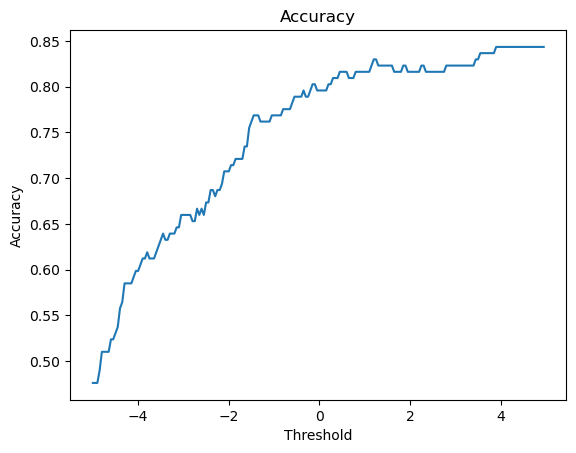

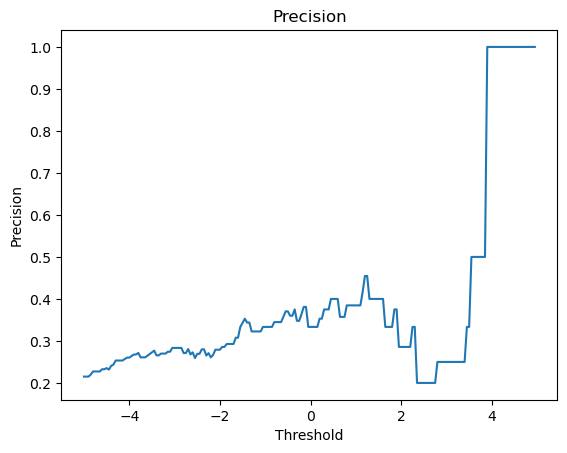

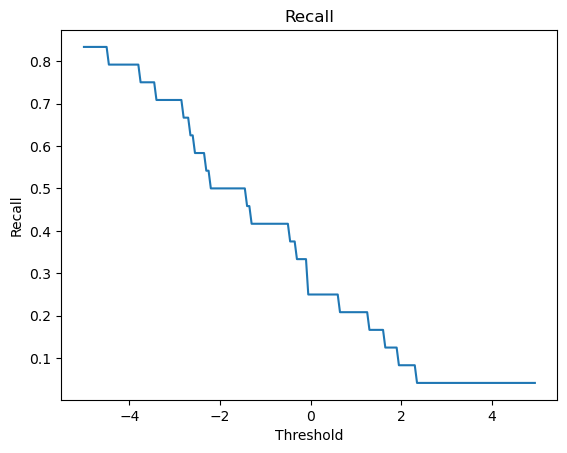

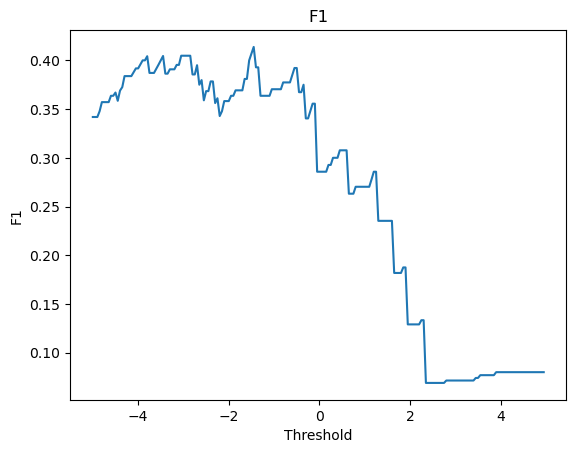

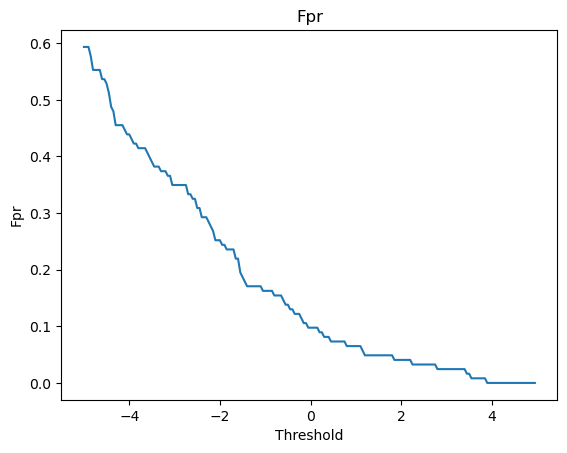

In [97]:
t = np.arange(-5,5,0.05)
plt.plot(t, hist_acc)
plt.title('Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

plt.plot(t, hist_pre)
plt.title('Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

plt.plot(t, hist_rec)
plt.title('Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

plt.plot(t, hist_F1)
plt.title('F1')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.show()

plt.plot(t, hist_fpr)
plt.title('Fpr')
plt.xlabel('Threshold')
plt.ylabel('Fpr')
plt.show()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.

From the result, bins = 5 has higher accuracy and F1 score but only a slightly. So I should conclude that 5 bins is better.

In [102]:
model.fit_params(x_train, y_train, 5)
y_pred = model.predict(x = x_test)

In [103]:
best_acc = float('-inf')
best_acc_t = -5
best_f1 = float('-inf')
best_f1_t = -5

hist_acc_5 = []
hist_pre_5 = []
hist_rec_5 = []
hist_F1_5 = []
hist_fpr_5 = []
for t in np.arange(-5,5,0.05):
    y_pred_t = model.predict(x = x_test, thresh = t)
    accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred_t, show_result=False)
    hist_acc_5.append(accuracy)
    hist_pre_5.append(precision)
    hist_rec_5.append(recall)
    hist_F1_5.append(F1)
    hist_fpr_5.append(fpr)
    if accuracy > best_acc:
        best_acc = accuracy
        best_acc_t = t
    if F1 > best_f1:
        best_f1 = F1
        best_f1_t = t

print(f'Best Accuracy is {best_acc} with threshold: {best_acc_t}')
print(f'Best F1 is {best_f1} with threshold: {best_f1_t}')

Best Accuracy is 0.850340130269795 with threshold: 0.899999999999979
Best F1 is 0.4444439269141384 with threshold: -0.45000000000001616


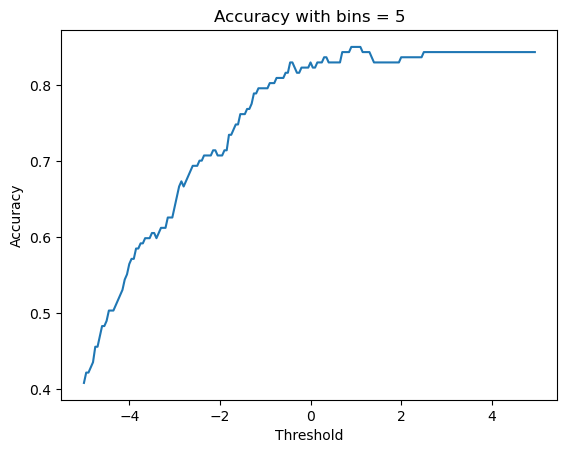

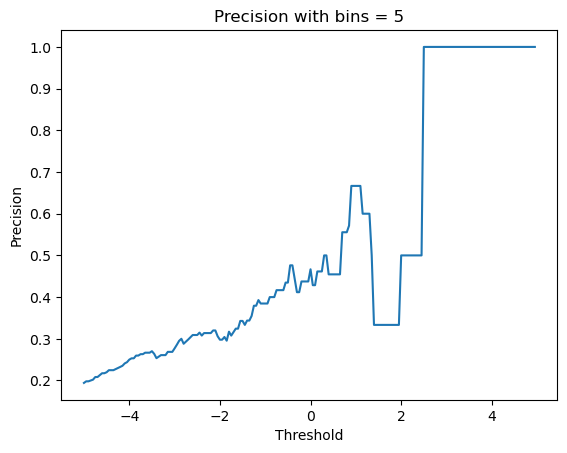

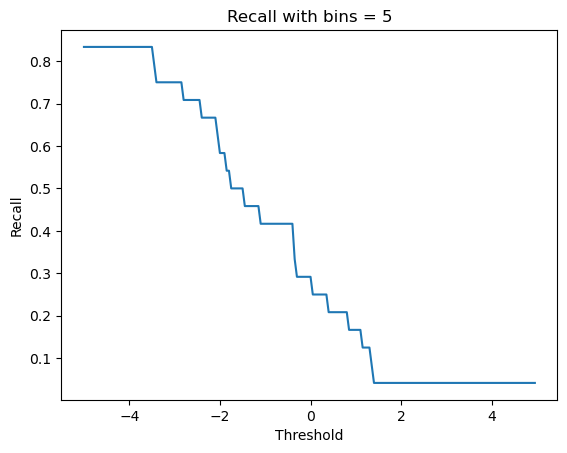

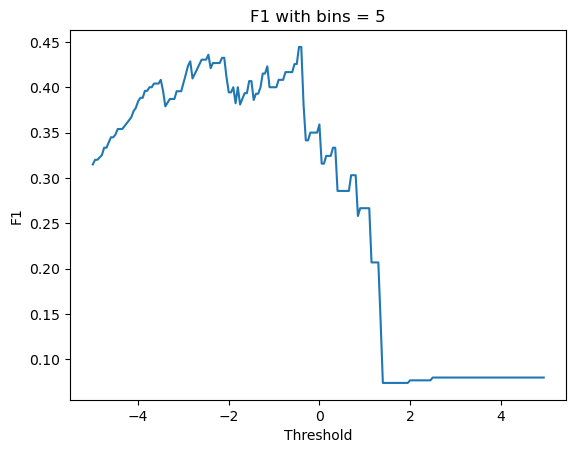

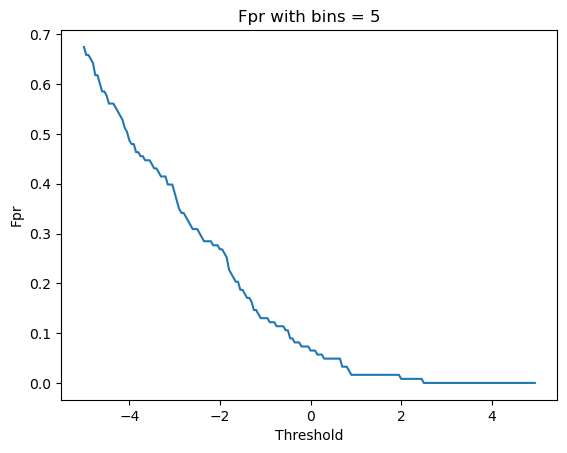

In [104]:
t = np.arange(-5,5,0.05)
plt.plot(t, hist_acc_5)
plt.title('Accuracy with bins = 5')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

plt.plot(t, hist_pre_5)
plt.title('Precision with bins = 5')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

plt.plot(t, hist_rec_5)
plt.title('Recall with bins = 5')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

plt.plot(t, hist_F1_5)
plt.title('F1 with bins = 5')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.show()

plt.plot(t, hist_fpr_5)
plt.title('Fpr with bins = 5')
plt.xlabel('Threshold')
plt.ylabel('Fpr')
plt.show()

In [105]:
#OT4
all_accu = []
for i in range(10):
    df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 42, stratify = df["Attrition"], shuffle = True)
    data_train = df_train.to_numpy()
    data_test = df_test.to_numpy()
    x_train = df_train.drop(columns=['Attrition']).to_numpy()
    y_train = df_train['Attrition'].to_numpy()

    x_test = df_test.drop(columns=['Attrition']).to_numpy()
    y_test = df_test['Attrition'].to_numpy()
    model = SimpleBayesClassifier(n_pos = (y_train==1).sum(), n_neg = (y_train==0).sum())
    model.fit_params(x_train, y_train)
    y_pred = model.predict(x = x_test)
    accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred_t, show_result=False)
    all_accu.append(accuracy)
print(f'mean: {np.mean(all_accu)}')
print(f'variance: {np.var(all_accu)}')

mean: 0.8435374092276365
variance: 1.232595164407831e-32
